In [59]:
"""
Resources:
* https://youtu.be/aircAruvnKk
* http://neuralnetworksanddeeplearning.com/
* playground.tensorflow.org
"""

"""
TASK 1
INSTRUCTIONS:
There are 11 TODOS in this python file
Fill each one of those appropriately and you will have a working neural network
Instructions and resources have been provided wherever possible.
The implementation may not be perfect, so feel free to point out any mistakes / ask any doubts
After completing the task, some of the things you could try are (optional):
* Implement different cost functions (binary cross-entropy)
* Implement different activation functions (tanh, ReLU, softmax)
* Incorporate these changes in the neural netwok code so that you can select the loss / activation function
* Play with the hyper-paramters!
"""

"""
TASK 2
INSTRUCTIONS:
* Go through the documentaation of scikit from:
  https://scikit-image.org/docs/stable/
  focus more on the neural network modules
  https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html (Neural Network Classifier)
  https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html  (Neural Network Regressor)
* Go through the MNIST dataset given here:
  http://yann.lecun.com/exdb/mnist/
  It can also be downloaded directly using scikit:
  https://scikit-learn.org/0.19/datasets/mldata.html
  But this seems to be deprecated, you could use a workaround given here:
  https://stackoverflow.com/questions/47324921/cant-load-mnist-original-dataset-using-sklearn
* Build a simple neural network (using scikit) and train it to recognize handwritten digits using the MNIST datasetself.
  Make sure that you are able to vsualize the different aspects of the network, play around with the hyper-parameters and
  try to get the best possible accuracy and report your accuracy on the ML-SIG group / channel
  Remember to test different hyper-parameters on the validation set and to report the accuracy from the test set
  https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7
"""
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 
from IPython import display


"""
Other Common activation functions are:
* tanh
* ReLU
* Softmax
Read more about these at:
https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
"""

def activation(z, derivative=False):
    """
    Sigmoid activation function:
    It handles two modes: normal and derivative mode.
    Applies a pointwise operation on vectors
    Parameters:
    ---
    z: pre-activation vector at layer l
        shape (n[l], batch_size)
    Returns:
    pontwize activation on each element of the input z
    """
    if derivative:
        pass
    #todo1-done
        return activation(z) * (1 - activation(z))
    else:
        pass
    #todo2-done
        return 1/(1+np.exp(-z))

def cost_function(y_true, y_pred):
    """
    Computes the Mean Square Error between a ground truth vector and a prediction vector
    Parameters:
    ---
    y_true: ground-truth vector
    y_pred: prediction vector
    Returns:
    ---
    cost: a scalar value representing the loss
    """
   
    y_pred= y_pred.T
    n = y_pred.shape[1]
    #edit
    cost = (1./(2*n)) * np.sum((y_true - y_pred) ** 2)
    return cost

def cost_function_prime(y_true, y_pred):
    """
    Computes the derivative of the loss function w.r.t the activation of the output layer
    Parameters:
    ---
    y_true: ground-truth vector
    y_pred: prediction vector
    Returns:
    ---
    cost_prime: derivative of the loss w.r.t. the activation of the output
    shape: (n[L], batch_size)
    
    """
    if y_true.shape!=y_pred.shape:
                y_pred=y_pred.T
    loss=(y_true - y_pred) ** 2
    ##so just the derivative
    #todo3-done
    cost_prime=y_pred - y_true
    return cost_prime.T
#edit

class NeuralNetwork(object):
    '''
    This is a custom neural netwok package built from scratch with numpy.
    The Neural Network as well as its parameters and training method and procedure will
    reside in this class.
    Parameters
    ---
    size: list of number of neurons per layer
    Examples
    ---
    >>> import NeuralNetwork
    >>> nn = NeuralNetwork([2, 3, 4, 1])
    This means :
    1 input layer with 2 neurons
    1 hidden layer with 3 neurons
    1 hidden layer with 4 neurons
    1 output layer with 1 neuron
    '''

    def __init__(self, size, seed=42):
        '''
        Instantiate the weights and biases of the network
        weights and biases are attributes of the NeuralNetwork class
        They are updated during the training
        '''
        self.seed = seed
        np.random.seed(self.seed)
        self.size = size
        # biases are initialized randomly
        self.biases = [np.random.rand(n, 1) for n in self.size[1:]]

        # TODO
        # initialize the weights randomly
        """
        Be careful with the dimensions of the weights
        The dimensions of the weight of any particular layer will depend on the
        size of the current layer and the previous layer
        Example: Size = [16,8,4,2]
        The weight file will be a list with 3 matrices with shapes:
        (8,16) for weights connecting layers 1 (16) and 2(8)
        (4,8) for weights connecting layers 2 (8) and 4(4)
        (2,4) for weights connecting layers 3 (4) and 4(2)
        Each matrix will be initialized with random values
        """
       #todo3-done
        self.weights = [np.random.randn(self.size[i], self.size[i-1]) * np.sqrt(6 / self.size[i-1]+self.size[i]) for i in range(1, len(self.size))]

    def forward(self, input):
        '''
        Perform a feed forward computation
        Parameters
        ---
        input: data to be fed to the network with
        shape: (input_shape, batch_size)
        Returns
        ---
        a: ouptut activation (output_shape, batch_size)
        pre_activations: list of pre-activations per layer
        each of shape (n[l], batch_size), where n[l] is the number
        of neuron at layer l
        activations: list of activations per layer
        each of shape (n[l], batch_size), where n[l] is the number
        of neuron at layer l
        '''
        a = input
        pre_activations = []
        activations = [a]
        # TODO
        #todo4 - done
        # what does the zip function do?
        #ans-zip is basically mapping similar index of multiple containers so that they can be used just using as single entity.
        #so here updating the a by doing a dot product of activation of layer1 with the weights of connectins
        #and adding a "bias" and then activating it by applying the sigmoid function to it.
        #pre activation is the array of z before applying sigmoid function to it
        for w, b in zip(self.weights, self.biases):
            #edit 
            w_shape=w.shape
            a_shape=a.shape
            if w_shape[1]!=a_shape[0]:
                a=a.T
            Z = np.dot(w, a) + b
            a  = activation(Z)
            pre_activations.append(Z)
            activations.append(a)
        return a, pre_activations, activations

    """
    Resources:
    https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
    https://hmkcode.github.io/ai/backpropagation-step-by-step/
    """
    def compute_deltas(self, pre_activations, y_true, y_pred):
        """
        Computes a list containing the values of delta for each layer using
        a recursion
        Parameters:
        ---
        pre_activations: list of of pre-activations. each corresponding to a layer
        y_true: ground truth values of the labels
        y_pred: prediction values of the labels
        Returns:
        ---
        deltas: a list of deltas per layer
        """

        # initialize array to store the derivatives
        deltas = [0] * (len(self.size) - 1)

        #TODO
        #todo5-done
        # Calculate the delta for each layer
        delta_layer=cost_function_prime(y_true, y_pred) * activation(pre_activations[-1], derivative=True)
        # This is the first step in calculating the derivative
        deltas[-1]=delta_layer
        #The last layer is calculated as derivative of cost function *  derivative of sigmoid ( pre-activations of last layer )
        #delta[-1] =

        #TODO
        #todo6-done
        # Recursively calculate delta for each layer from the previous layer
        for l in range(len(deltas) - 2, -1, -1):
            pass
            delta = np.dot(self.weights[l + 1].transpose(), deltas[l + 1]) * activation(pre_activations[l], derivative=True) 
            deltas[l] = delta
            # deltas of layer l depend on the weights of layer l and l+1 and on the sigmoid derivative of the pre-activations of layer l
            # Note that we use a dot product when multipying the weights and the deltas
            # Check their shapes to ensure that their shapes conform to the requiremnts (You may need to transpose some of the matrices)
            # The final shape of deltas of layer l must be the same as that of the activations of layer l
            # Check if this is true
            # delta[l] =
        return deltas

    def backpropagate(self, deltas, pre_activations, activations):
        """
        Applies back-propagation and computes the gradient of the loss
        w.r.t the weights and biases of the network
        Parameters:
        ---
        deltas: list of deltas computed by compute_deltas
        pre_activations: a list of pre-activations per layer
        activations: a list of activations per layer
        Returns:
        ---
        dW: list of gradients w.r.t. the weight matrices of the network
        db: list of gradients w.r.t. the biases (vectors) of the network
        """
        dW = []
        db = []
        deltas = [0] + deltas
        for l in range(1, len(self.size)):
            #edit
            if deltas[l].shape[1] != activations[l-1].shape[0]:
                activations[l-1]=activations[l-1].T
            # TODO
            #todo-7 done
            q=activations[l-1]
            dW_temp = np.dot(deltas[l],q ) 
            db_temp = deltas[l]
            
            # Compute the derivatives of the weights and the biases from the delta values calculated earlier
            # dW_temp depends on the activations of layer l-1 and the deltas of layer l
            # dB_temp depends only on the deltas of layer l
            # Again be careful of the dimensions and ensure that the dW matrix has the same shape as W
            # dW =
            # dB =
            dW.append(dW_temp)
            db.append(np.expand_dims(db_temp.mean(axis=1), 1))
        return dW, db

    def plot_loss(self,epochs,train,test):
        """
        Plots the loss function of the train test data measured every epoch
        Parameters:
        ---
        epochs: number of epochs for training
        train: list of losses on the train set measured every epoch
        test: list of losses on the test set measured every epoch
        """

        plt.subplot(211)
        plt.title('Training Cost (loss)')
        plt.plot(range(epochs),train)

        plt.subplot(212)
        plt.title('Test Cost (loss)')
        plt.plot(range(epochs),test)

        plt.subplots_adjust(hspace=0.5)
        plt.show()

    def train(self, X, y_org, batch_size, epochs, learning_rate, validation_split=0.2, print_every=10):
        """
        Trains the network using the gradients computed by back-propagation
        Splits the data in train and validation splits
        Processes the training data by batches and trains the network using batch gradient descent
        Parameters:
        ---
        X: input data
        y: input labels
        batch_size: number of data points to process in each batch
        epochs: number of epochs for the training
        learning_rate: value of the learning rate
        validation_split: percentage of the data for validation
        print_every: the number of epochs by which the network logs the loss and accuracy metrics for train and validations splits
        plot_every: the number of epochs by which the network plots the decision boundary
        Returns:
        ---
        history: dictionary of train and validation metrics per epoch
            train_acc: train accuracy
            test_acc: validation accuracy
            train_loss: train loss
            test_loss: validation loss
        This history is used to plot the performance of the model
        """
        temp_y=np.copy(y_org)
        history_train_losses = []
        history_train_accuracies = []
        history_test_losses = []
        history_test_accuracies = []
        s=temp_y.tolist()
        #one_hot encoding
        for u in range(len(temp_y)):
            if s[u]==0:
                s[u]=[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
            if s[u]==1:
                s[u]=[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
            if s[u]==2:
                s[u]=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
            if s[u]==3:
                s[u]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
            if s[u]==4:
                s[u]=[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
            if s[u]==5:
                s[u]=[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
            if s[u]==6:
                s[u]=[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
            if s[u]==7:
                s[u]=[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
            if s[u]==8:
                s[u]=[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
            if s[u]==9:
                s[u]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
        y=np.array(s)
        

        # TODO
        #todo8- done
        # Read about the train_test_split function
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        epoch_iterator = range(epochs)

        for e in epoch_iterator:
            if x_train.shape[1] % batch_size == 0:
                n_batches = int(x_train.shape[1] / batch_size)
            else:
                n_batches = int(x_train.shape[1] / batch_size ) - 1

            x_train, y_train = shuffle(x_train, y_train)

            batches_x = [x_train[batch_size*i:batch_size*(i+1),:] for i in range(0, n_batches)]
            batches_y = [y_train[batch_size*i:batch_size*(i+1)] for i in range(0, n_batches)]

            train_losses = []
            train_accuracies = []

            test_losses = []
            test_accuracies = []

            dw_per_epoch = [np.zeros(w.shape) for w in self.weights]
            db_per_epoch = [np.zeros(b.shape) for b in self.biases]

            for batch_x, batch_y in zip(batches_x, batches_y):
                batch_y_pred, pre_activations, activations = self.forward(batch_x)
                deltas = self.compute_deltas(pre_activations, batch_y, batch_y_pred)
                dW, db = self.backpropagate(deltas, pre_activations, activations)
                for i, (dw_i, db_i) in enumerate(zip(dW, db)):
                    dw_per_epoch[i] += dw_i / batch_size
                    db_per_epoch[i] += db_i / batch_size

                batch_y_train_pred = self.predict(batch_x)

                train_loss = cost_function(batch_y, batch_y_train_pred)
                train_losses.append(train_loss)
                #edit
                if batch_y.shape != batch_y_train_pred.shape:
                    batch_y_train_pred = batch_y_train_pred.T
                train_accuracy = accuracy_score(batch_y.T, batch_y_train_pred.T)
                train_accuracies.append(train_accuracy)

                batch_y_test_pred = self.predict(x_test)

                test_loss = cost_function(y_test, batch_y_test_pred)
                test_losses.append(test_loss)
                test_accuracy = accuracy_score(y_test, batch_y_test_pred.T)
                test_accuracies.append(test_accuracy)


            # weight update

            # TODO
            #todo9-done
            # What does the enumerate function do?
            #enumerate function sort of indexes the for loop means it adds a counter to an iterable and returns it in a form of enumerate object. 
            for i, (dw_epoch, db_epoch) in enumerate(zip(dw_per_epoch, db_per_epoch)):
                pass
                # TODO
                #todo10-done
                for i, (dw_epoch, db_epoch) in enumerate(zip(dw_per_epoch, db_per_epoch)):
                    self.weights[i] = self.weights[i] - learning_rate * dw_epoch
                    self.biases[i] = self.biases[i] - learning_rate * db_epoch
                # Update the weights using the backpropagation algorithm implemented earlier
                # W = W - learning_rate * derivatives (dW)
                # b = b - learning_rate * derivatives (db)
                # self.weights =
                # self.biases =

            history_train_losses.append(np.mean(train_losses))
            history_train_accuracies.append(np.mean(train_accuracies))

            history_test_losses.append(np.mean(test_losses))
            history_test_accuracies.append(np.mean(test_accuracies))


            """
            if not plot_every:
                if e % print_every == 0:    
                    print('Epoch {} / {} | train loss: {} | train accuracy: {} | val loss : {} | val accuracy : {} '.format(
                        e, epochs, np.round(np.mean(train_losses), 3), np.round(np.mean(train_accuracies), 3), 
                        np.round(np.mean(test_losses), 3),  np.round(np.mean(test_accuracies), 3)))
            else:
                if e % plot_every == 0:
                    self.plot_decision_regions(x_train, y_train, e, 
                                                np.round(np.mean(train_losses), 4), 
                                                np.round(np.mean(test_losses), 4),
                                                np.round(np.mean(train_accuracies), 4), 
                                                np.round(np.mean(test_accuracies), 4), 
                                                )
                    plt.show()                    
                    display.display(plt.gcf())
                    display.clear_output(wait=True)

        self.plot_decision_regions(X, y, e, 
                                    np.round(np.mean(train_losses), 4), 
                                    np.round(np.mean(test_losses), 4),
                                    np.round(np.mean(train_accuracies), 4), 
                                    np.round(np.mean(test_accuracies), 4), 
                                    )
            """

        history = {'epochs': epochs,
                   'train_loss': history_train_losses,
                   'train_acc': history_train_accuracies,
                   'test_loss': history_test_losses,
                   'test_acc': history_test_accuracies
                   }
        return history

    def predict(self, a):
        '''
        Use the current state of the network to make predictions
        Parameters:
        ---
        a: input data, shape: (input_shape, batch_size)
        Returns:
        ---
        predictions: vector of output predictions
        '''
        for w, b in zip(self.weights, self.biases):
            #edit
            if w.shape[1]!=a.shape[0]:
                a=a.T
            z = np.dot(w, a) + b
            a = activation(z)
        predictions = (a > 0.5).astype(int)
        return predictions

# Author: Ahmed BESBES
# <ahmed.besbes@hotmail.com>

In [32]:
import sklearn

In [40]:
from sklearn.model_selection import train_test_split

In [16]:
from mnist.loader import MNIST

mnist = MNIST(r"C:/Users/ritik/Downloads/dataset/MNIST")
x_train, y_train = mnist.load_training() #60000 samples
x_test, y_test = mnist.load_testing() #10000 samples

In [17]:
import os,codecs,numpy

# PROVIDE YOUR DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = 'C:/Users/ritik/Downloads/dataset/MNIST/'

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed = parsed.reshape(length,num_rows*num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
            elif(type == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]                           
            if (length==10000):
                set = 'test1'
            elif (length==60000):
                set = 'train1'
            data_dict[set+'_'+category] = parsed  # SAVE THE NUMPY ARRAY TO A CORRESPONDING KEY

Reading  t10k-images-idx3-ubyte
Reading  t10k-labels-idx1-ubyte
Reading  train-images-idx3-ubyte
Reading  train-labels-idx1-ubyte


In [43]:
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = numpy.random.rand(28 * 28 * n_samples)
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, 28, 28, 1))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [18]:
x_training1= data_dict['train1_images']
x_training1.astype("float16")
y_training1= data_dict['train1_labels']
y_training1.astype("float16")

array([5., 0., 4., ..., 5., 6., 8.], dtype=float16)

In [41]:
x_training2=[]
y_training2=[]
for t in range(500):
    x_training2.append(x_training1[t]/255)
for t in range(500):
    y_training2.append(y_training1[t])    
x_training2=np.array(x_training2) 
y_training2=np.array(y_training2) 
print (x_training2.shape)
print (y_training2.shape)


(500, 784)
(500,)


In [60]:
nn=NeuralNetwork([784, 300, 10, 10])
nn.train(x_training2, y_training2, 10, 15,  0.1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:288: RuntimeWarning: Mean of empty slice.


ValueError: unknown is not supported

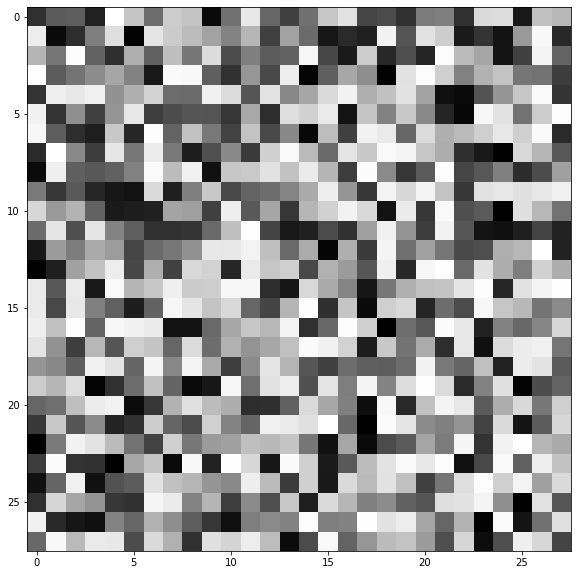

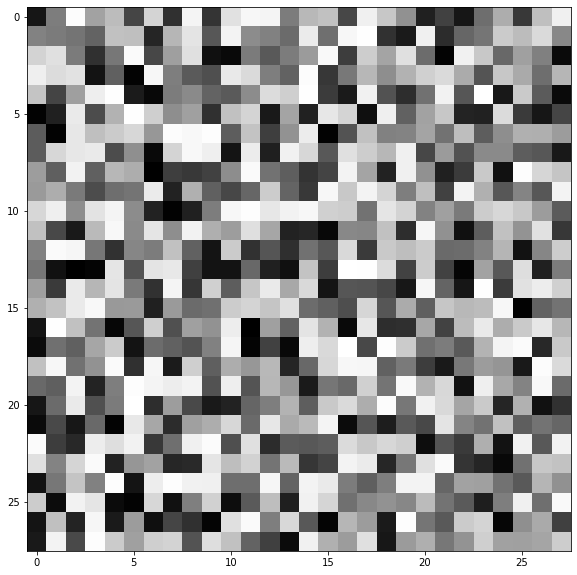

In [54]:
import random
X = numpy.random.rand(28 * 28 * 2)
# reshape into a batch of grayscale images
X = X.reshape((2, 28, 28, 1))
for i in range(2):
    img = X[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()